In [ ]:
#!pip install scikit-image
#!pip install tensorflow
#!pip install matplotlib
#!pip install opencv-python

In [13]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import tensorflow as tf
import skimage
from skimage import data

In [12]:
print(f"versión cv2: {cv2.__version__}")
print(f"versión skimage: {skimage.__version__}")
print(f"versión tf: {tf.__version__}")
print(f"versión np: {np.__version__}")
print(f"versióm matplotlib: {matplotlib.__version__}")

versión cv2: 4.10.0
versión skimage: 0.24.0
versión tf: 2.17.1
versión np: 1.26.4
versióm matplotlib: 3.8.0


In [14]:
coins=data.coins()

In [15]:
coins.shape

(303, 384)

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)
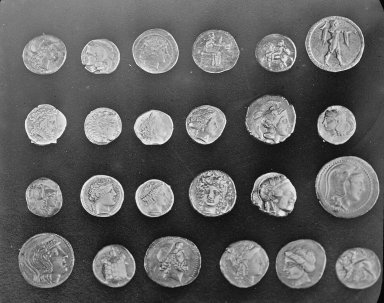

In [16]:
coins

In [18]:
coins[1:10,1:10]

array([[144, 145, 143, 145, 132, 135, 133, 134, 133],
       [147, 143, 147, 145, 132, 136, 133, 134, 132],
       [136, 133, 139, 136, 130, 138, 133, 133, 131],
       [133, 134, 135, 129, 130, 137, 128, 132, 130],
       [133, 137, 132, 127, 133, 135, 126, 131, 130],
       [130, 133, 130, 131, 135, 132, 130, 130, 129],
       [130, 131, 130, 135, 135, 128, 132, 129, 129],
       [134, 136, 133, 129, 129, 129, 128, 131, 129],
       [130, 133, 131, 129, 129, 129, 129, 129, 128]], dtype=uint8)

In [21]:
def imshow(img):
  fig,ax = plt.subplots(figsize=(5,5))
  ax.imshow(img,cmap=plt.cm.gray)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()

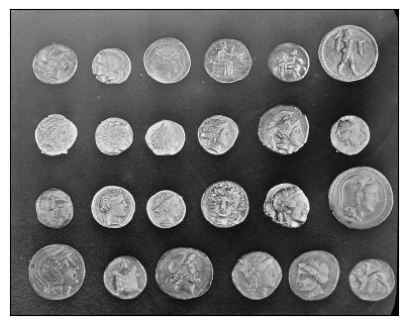

In [22]:
imshow(coins)

In [27]:
type(coins)

numpy.ndarray

In [28]:
np.max(coins)

252

In [38]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [40]:
np.max(a,axis=0)

array([12, 13, 14, 15])

In [41]:
np.max(a,axis=1)

array([ 3,  7, 11, 15])

In [49]:
max_img_col = np.max(coins,axis=0)
print(max_img_col)
max_img_row = np.max(coins,axis=1)
print(max_img_row)

[132 147 145 150 145 135 138 135 134 133 131 133 137 138 134 131 132 131
 132 166 165 171 170 216 197 240 243 242 233 237 243 239 231 228 228 231
 238 238 236 238 235 238 233 238 233 239 232 231 235 249 235 233 227 243
 243 252 232 242 231 243 239 243 248 242 244 249 212 212 178 169 188 174
 174 213 137 135 134 134 135 136 172 240 234 233 235 245 235 238 232 231
 240 235 248 223 245 228 225 228 229 220 227 227 226 226 220 232 230 229
 224 212 223 229 231 226 232 234 232 237 235 234 236 236 229 208 204 200
 209 193 198 208 204 212 206 226 235 225 236 247 235 227 232 237 238 238
 233 235 232 236 234 230 226 237 226 224 225 224 225 230 233 239 233 244
 234 233 229 228 229 243 231 237 236 241 241 239 221 228 231 224 199 208
 194 203 208 196 189 179 224 219 217 228 232 226 214 228 219 219 227 222
 233 231 227 250 221 221 215 230 235 229 230 226 237 229 233 224 213 217
 214 228 221 235 224 226 229 234 233 241 221 220 220 228 224 213 210 221
 225 233 203 181 202 168 181 175 174 180 182 179 20

In [50]:
max_img_row.shape

(303,)

In [51]:
max_img_col.shape

(384,)

<function matplotlib.pyplot.show(close=None, block=None)>

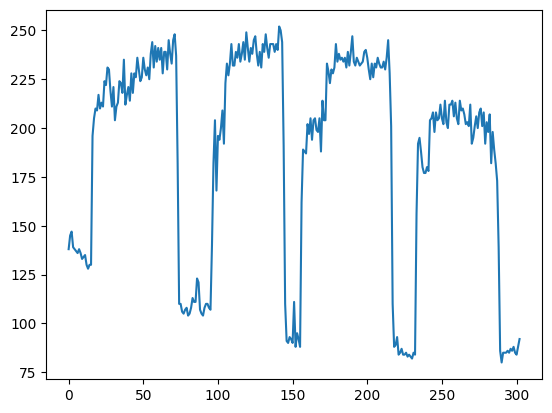

In [52]:
plt.plot(max_img_row)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

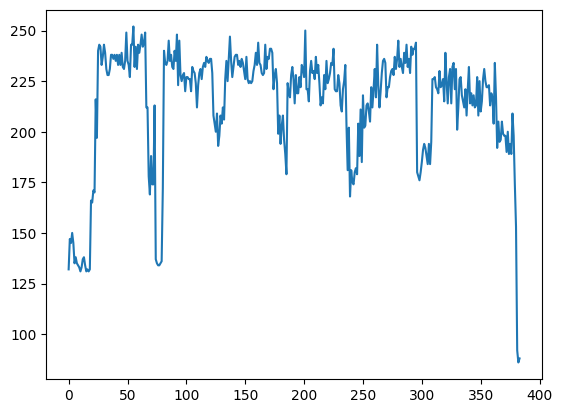

In [53]:
plt.plot(max_img_col)
plt.show

In [59]:
umbral=160
bin_max_img_row = 255*(max_img_row>umbral)

<function matplotlib.pyplot.show(close=None, block=None)>

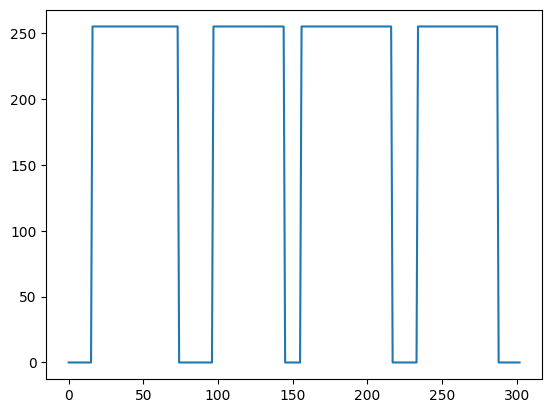

In [60]:
plt.plot(bin_max_img_row)
plt.show

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)
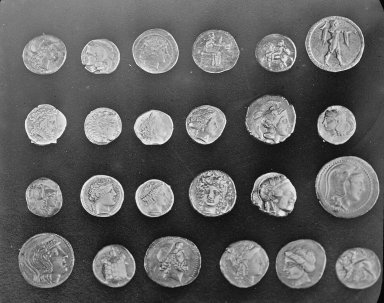

In [66]:
test_coins = coins.copy()

In [67]:
test_coins[bin_max_img_row==0, : ]=255

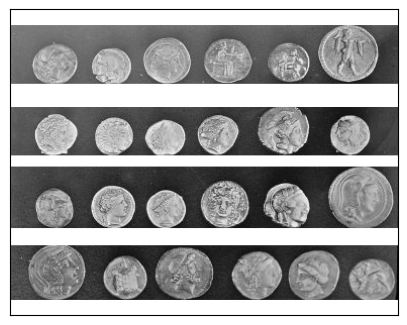

In [68]:
imshow(test_coins)

In [69]:
img = cv2.imread('/content/Image20241205150627.png')

In [70]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

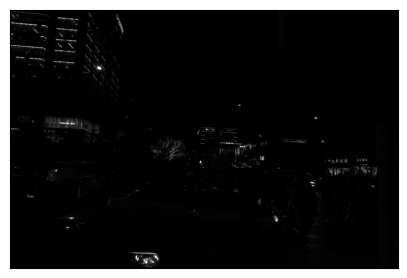

In [71]:
imshow(img_gray)

In [88]:

# Crear el histograma
def histo (img):
  plt.hist(img, bins=30, edgecolor='black')
  plt.title('Histograma')
  plt.xlabel('Valor')
  plt.ylabel('Frecuencia')
  plt.show()

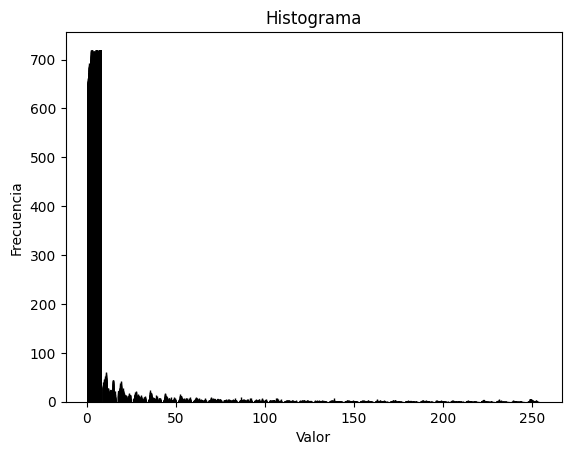

In [90]:
histo(img_gray)

In [76]:
img_gray1 = img_gray.copy()

In [77]:
 img_gray2 = cv2.add(img_gray, img_gray1)

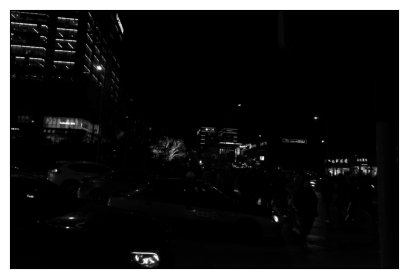

In [78]:
imshow(img_gray2)

In [79]:
 img_gray3 = cv2.add(img_gray1, img_gray2)

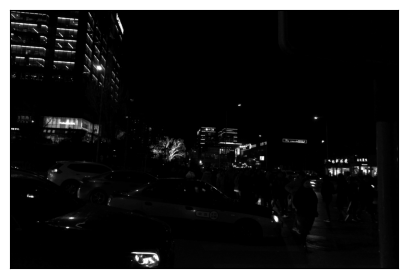

In [80]:
imshow(img_gray3)

In [81]:
 img_gray4 = cv2.add(img_gray2, img_gray3)

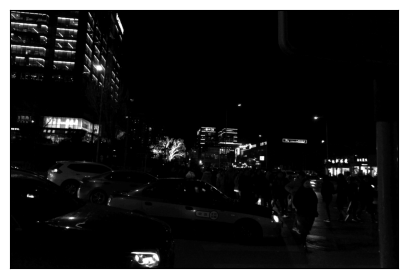

In [82]:
imshow(img_gray4)

In [83]:
 img_gray5 = cv2.add(img_gray3, img_gray4)

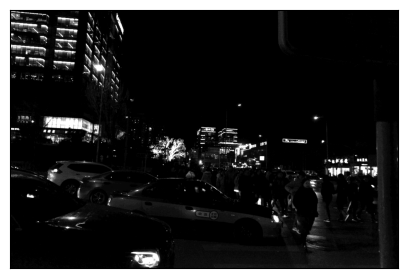

In [84]:
imshow(img_gray5)

In [85]:
img_gray6 = cv2.add(img_gray4, img_gray5)

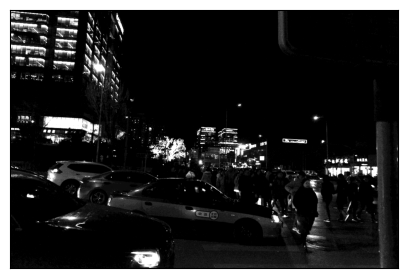

In [86]:
imshow(img_gray6)

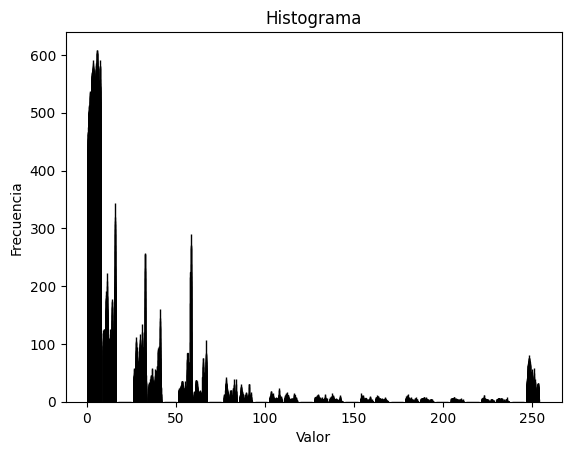

In [89]:
histo(img_gray6)

In [100]:
# Invertir los colores de la imagen
img_invertida_gray = cv2.bitwise_not(img_gray6)

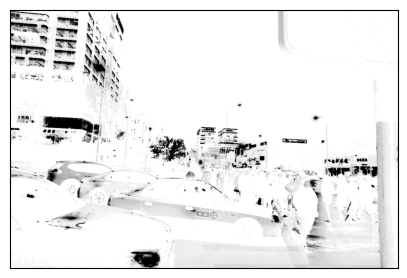

In [101]:
imshow(img_invertida_gray)

In [102]:
img_invertida = 255 - img_gray6

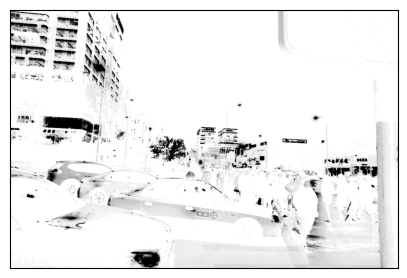

In [103]:
imshow(img_invertida)

In [119]:
# Convertir la imagen a tipo float32 para evitar problemas con el logaritmo
img_float = np.float32(img)

# Aplicar el logaritmo
c = 255 / np.log(1 + np.max(img_float))
log_image = c * np.log(1 + img_float)

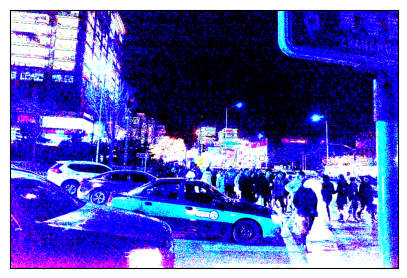

In [114]:
imshow(log_image)

In [116]:
# Convertir la imagen a tipo float32 para evitar problemas con el logaritmo
img_float_gray = np.float32(img_gray6)

# Aplicar el logaritmo
c = 255 / np.log(1 + np.max(img_float_gray))
log_image = c * np.log(1 + img_float_gray)

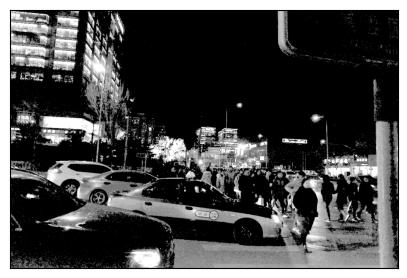

In [117]:
imshow(log_image)

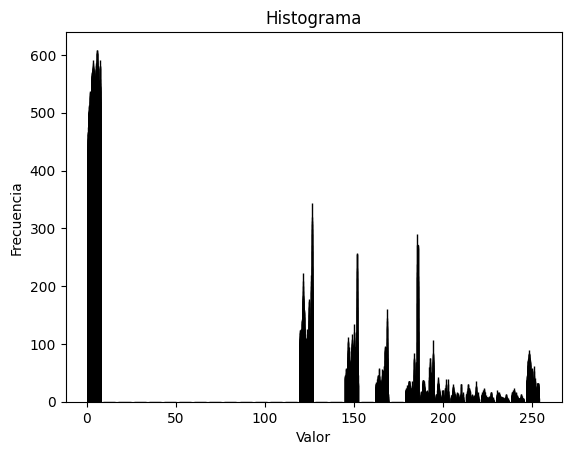

In [118]:
histo(log_image)

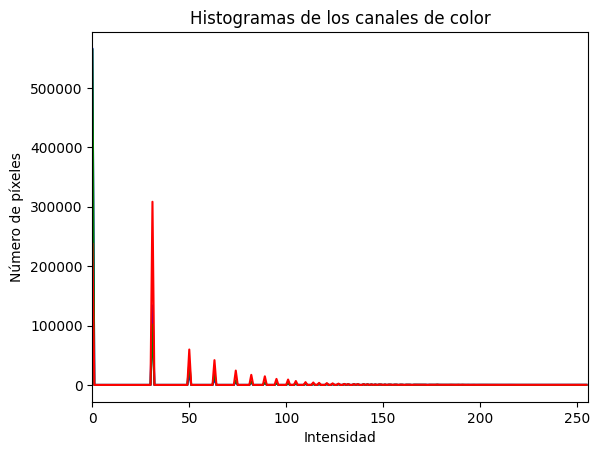

In [120]:
# Separar los canales de color
canales = ('b', 'g', 'r')
colores = ('blue', 'green', 'red')

# Crear una figura para los histogramas
plt.figure()
plt.title('Histogramas de los canales de color')
plt.xlabel('Intensidad')
plt.ylabel('Número de píxeles')

# Calcular y graficar el histograma para cada canal
for canal, color in zip(canales, colores):
    hist = cv2.calcHist([log_image], [canales.index(canal)], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

# Mostrar los histogramas
plt.show()